This notebook gets lyrics using the GeniusLyrics package and does some initial exploration. We're starting with Slayer. 

## Import packages

In [1]:
import lyricsgenius as genius
import json
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
#from textblob import TextBlob

## Get all the lyrics 

...and write them to a .json file

In [43]:
api_key = 'Nc3VjqRNlEZiD9mqOQATDQ5PuZ4IjdgV13n7c39OIyNwsjuazZThQlQkdr_Hts4c'
api = genius.Genius(api_key)
api.remove_section_headers = True # Removes section headers like "Verse" and "Intro"
api.excluded_terms = ["(Remix)", "(Live)", "(Jeff)", "(Orchestral Version)", "(Film Transcript)"] # Exclude songs with these words in their title
api.skip_non_songs = True # Exclude hits thought to be non-songs (e.g. track lists)

artist = api.search_artist('Bob Dylan')

lyrics = artist.save_lyrics()


Searching for songs by Bob Dylan...

Song 1: "Murder Most Foul"
Song 2: "Blowin’ in the Wind"
Song 3: "The Times They Are A-Changin’"
Song 4: "All Along the Watchtower"
Song 5: "Like a Rolling Stone"
Song 6: "Make You Feel My Love"
Song 7: "Hurricane"
Song 8: "Don’t Think Twice, It’s All Right"
Song 9: "Mr. Tambourine Man"
Song 10: "Subterranean Homesick Blues"
Song 11: "A Hard Rain’s a-Gonna Fall"
Song 12: "Desolation Row"
Song 13: "Tangled Up in Blue"
Song 14: "Masters of War"
Song 15: "Tempest"
Song 16: "Knockin’ on Heaven’s Door"
Song 17: "It’s Alright, Ma (I’m Only Bleeding)"
Song 18: "Girl from the North Country"
Song 19: "To Fall in Love with You"
Song 20: "Visions of Johanna"
Song 21: "Ballad of a Thin Man"
Song 22: "It’s All Over Now, Baby Blue"
Song 23: "Shelter from the Storm"
Song 24: "Lay Lady Lay"
Song 25: "I Contain Multitudes"
Song 26: "Idiot Wind"
Song 27: "Duquesne Whistle"
Song 28: "My Back Pages"
Song 29: "Just Like a Woman"
Song 30: "Boots of Spanish Leather"
Song 

Song 255: "Man of Peace"
Song 256: "Who Killed Davey Moore?"
Song 257: "Main Title Theme (Billy)"
Song 258: "P.S. I Love You"
Song 259: "Stardust"
Song 260: "Tell Me That It Isn’t True"
Song 261: "Seven Curses"
Song 262: "Union Sundown"
Song 263: "Beyond Here Lies Nothin’"
Song 264: "Po’ Boy"
Song 265: "Born in Time"
Song 266: "Sugar Baby"
Song 267: "Death Is Not the End"
Song 268: "On a Rainy Afternoon"
Song 269: "Pretty Peggy-O"
Song 270: "No Time to Think"
Song 271: "Lonesome Day Blues"
Song 272: "Belle Isle"
Song 273: "I Am a Lonesome Hobo"
Song 274: "900 Miles from My Home"
Song 275: "Rollin’ and Tumblin’"
Song 276: "Honest with Me"
Song 277: "Hard Times in New York Town (Demo)"
Song 278: "Positively Van Gogh"
Song 279: "New Pony"
Song 280: "Saved"
Song 281: "Floater (Too Much to Ask)"
Song 282: "When You Gonna Wake Up"
Song 283: "When He Returns"
Song 284: "What Was It You Wanted"
Song 285: "The Levee’s Gonna Break"
Song 286: "Can’t Leave Her Behind"
Song 287: "Pressing On"
Song 

Song 514: "Talkin’ Hava Negeilah Blues"
Song 515: "Eternal Circle"
Song 516: "God Knows"
Song 517: "All I Have To Do Is Dream"
Song 518: "Watered-Down Love"
Song 519: "Medicine Sunday"
Song 520: "Take Me As I Am (Or Let Me Go)"
Song 521: "32-20 Blues"
Song 522: "Worried Blues"
Song 523: "Lonesome Whistle Blues"
Song 524: "One Man’s Loss"
Song 525: "Take a Message to Mary"
Song 526: "Clean Cut Kid"
Song 527: "Baby Please Don’t Go"
Song 528: "Step It Up and Go"
Song 529: "Jet Pilot"
Song 530: "Sittin’ on Top of the World"
Song 531: "I’m Your Teenage Prayer"
Song 532: "When I Got Troubles"
Song 533: "Tell Ol’ Bill (Alternate Version, North Country Soundtrack)"
Song 534: "Mary Ann"
Song 535: "Handsome Molly"
Song 536: "Got My Mind Made Up"
Song 537: "Stealin’"
Song 538: "On a Little Street in Singapore"
Song 539: "In Search of Little Sadie"
Song 540: "Black Cross"
Song 541: "The Love That Faded"
Song 542: "Copper Kettle (The Pale Moonlight)"
Song 543: "Woogie Boogie"
Song 544: "Whatcha Gon

Song 735: "Untitled 7 (Charlie)"
Song 736: "Ramblin’ on My Mind"
"Ballad of a Thin Man [Live 1966]" is not valid. Skipping.
Song 737: "Down on Me"
"Just Like A Woman (Live)" is not valid. Skipping.
Song 738: "Man on the Street (Fragment)"
Song 739: "Idiot Wind [Hard Rain]"
Song 740: "Guess Things Happen That Way"
Song 741: "Fixin’ To Die Blues"
Song 742: "U.D. Blues"
"Mr. Tambourine Man (Live)" is not valid. Skipping.
Song 743: "John Brown [MTV Unplugged]"
Song 744: "Shelter from the Storm [Hard Rain]"
Song 745: "Blowin’ In The Wind [At Budokan]"
"Desolation Row [Live 1966]" is not valid. Skipping.
Song 746: "Lay, Lady, Lay [Hard Rain]"
"I Don’t Believe You (She Acts Like We Never Have Met) [Live 1966]" is not valid. Skipping.
Song 747: "Keep Your Hands Off Her"
"Visions of Johanna [Live 1966]" is not valid. Skipping.
"Devil Doll / Just Like Tom Thumb’s Blues (Live)" is not valid. Skipping.
Song 748: "All Along the Watchtower (English Final Assignment)"
"Like A Rolling Stone (Live 1995

## Create Lyrics DataFrame

In [44]:
with open("Lyrics_BobDylan.json") as f:
    data = json.load(f)

df = pd.DataFrame(data["songs"])[["title", "lyrics"]]
df.dropna(inplace=True)

df.head()

,title,lyrics
0,Murder Most Foul,"It was a dark day in Dallas, November '63\nA d..."
1,Blowin’ in the Wind,How many roads must a man walk down\nBefore yo...
2,The Times They Are A-Changin’,"Come gather 'round people, wherever you roam\n..."
3,All Along the Watchtower,"""There must be some way out of here""\nSaid the..."
4,Like a Rolling Stone,Once upon a time you dressed so fine\nThrew th...


In [45]:
#Take a look at a song
df.at[171,'lyrics']

"I am a man of constant sorrow\nI've seen trouble all my days\nI'll say goodbye to Colorado\nWhere I was born and partly raised\n\nYour mother says that I'm a stranger\nA face you'll never see no more\nBut there's one promise darling\nI'll see you on God's golden shore\n\nThrough this open world I'm a-bound to ramble\nThrough ice and snow, sleet and rain\nI'm a-bound to ride that morning railroad\nPerhaps I'll die on that train\n\nI'm a-going back to Colorado\nThe place that I've started from\nIf I'd know-ed how bad you'd treat me\nHoney, I never would have come"

In [24]:
df.shape

(214, 2)

In [25]:
#For Slayer only
#This song (111) is actually a story about the guitarist's death, so it needs to be taken out of the corpus. 
#df = df.drop([111])

In [46]:
#Remove all structure except for basic line structure
df["lyrics"] = (
    df["lyrics"]
    .apply(lambda x: x.lower())
     .apply(lambda x: x.replace("\\", " "))
     .apply(lambda x: x.replace("\\n", " "))
     .apply(lambda x: x.replace("(", ""))
     .apply(lambda x: x.replace(")", ""))
     .apply(lambda x: x.replace("\'", "'"))
     .apply(lambda x: x.replace("\n\n", "\n"))
     .apply(lambda x: x.replace("\n \n", "\n"))
     .apply(lambda x: x.replace("\n\n\n", "\n"))
     #.apply(lambda x: x.replace("\u205", ""))
     .apply(lambda x: x.replace("\u205f", ""))
     .apply(lambda x: x.replace("\u2005", ""))
)
df.head()

,title,lyrics
0,Murder Most Foul,"it was a dark day in dallas, november '63\na d..."
1,Blowin’ in the Wind,how many roads must a man walk down\nbefore yo...
2,The Times They Are A-Changin’,"come gather 'round people, wherever you roam\n..."
3,All Along the Watchtower,"""there must be some way out of here""\nsaid the..."
4,Like a Rolling Stone,once upon a time you dressed so fine\nthrew th...


In [47]:
text = "\n".join(df.lyrics)
len(text)

1150350

In [48]:
text_file = open("BobDylan_corpus_final.txt", "w")
text_file.write(text)
text_file.close()



## Explore Data

In [13]:
# Define default stopwords list
stoplist = ENGLISH_STOP_WORDS

In [14]:
df_explore = df;

df_explore["lyrics"] = (
    df_explore["lyrics"]
    .apply(lambda x: x.lower())
    .apply(lambda x: x.replace("\\", " "))
    .apply(lambda x: x.replace("\\n", " "))
    .apply(lambda x: x.replace("\n", " "))
    .apply(lambda x: x.replace("'", ""))
    .apply(lambda x: x.replace("\n\n", "\n"))
    .apply(lambda x: x.replace("\n \n", "\n"))
    .apply(lambda x: x.replace("\n\n\n", "\n"))
)
df_explore.head()

,title,lyrics
0,Venus as a Boy,his wicked sense of humour suggests exciting s...
1,Black Lake,our love was my womb but our bond has broken m...
2,Pagan Poetry,pedalling through the dark currents i find an ...
3,Stonemilker,a juxtapositioning fate find our mutual coordi...
4,Hyper-ballad,we live on a mountain right at the top theres ...


In [21]:
def show_wordcloud(text):
    # Create and generate a word cloud image:
    wordcloud = WordCloud(stopwords=stoplist, background_color="white", colormap="Blues").generate(text)

    # Display the generated image:
    fig = plt.figure(figsize=(10,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    #plt.title(f'Word Cloud for Bjork', fontsize=20)
    plt.axis("off")
    plt.show()

In [22]:
def get_wordcloud(df):
    # Get all texts and generate a cloud
    text = " ".join(review for review in df.lyrics)
    show_wordcloud(text) 

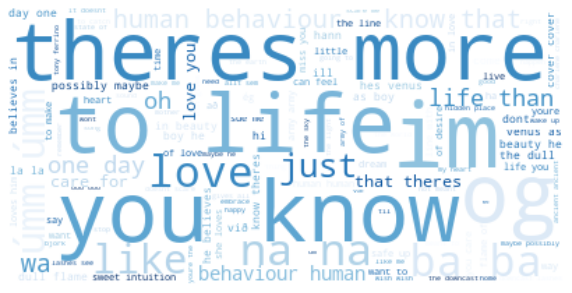

In [23]:
get_wordcloud(df)

In [34]:
sentence = ("Venus as a\nboy")

In [35]:
print(sentence)

Venus as a
boy
